In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import warnings as ws
ws.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('FiveYearData.csv', index_col=0, low_memory=False)

In [3]:
loan_data.head()

,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,...,taxes_ins_costs,misc_costs,actual_loss,modcost,stepmod_ind,dpm_ind,eltv,zb_removal_upb,dlq_acrd_int,Default
0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,152675.92,NaN,YES
2,F114Q1000004,742,201403,9,204402,NaN,0,1,P,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,F114Q1000010,667,201403,N,204402,NaN,25,1,P,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


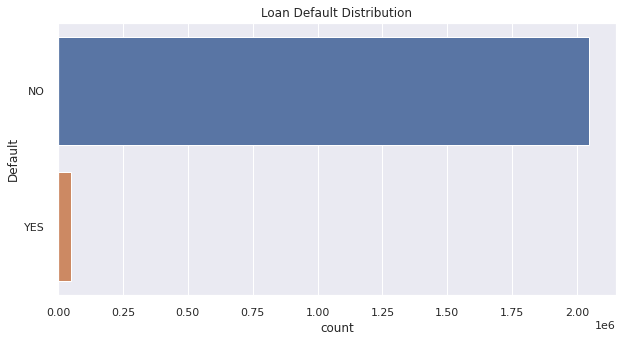

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, y=loan_data['Default']).set_title('Loan Default Distribution');

In [5]:
def missing_perc(df=loan_data):
    missing_vals = df.isnull().sum().sort_values(ascending=False)
    return missing_vals[missing_vals > 0] / df.shape[0]

In [6]:
print(missing_perc(loan_data))

legal_costs          0.999991
maint_pres_costs     0.999991
dlq_acrd_int         0.999991
mi_recoveries        0.999991
net_sale_proceeds    0.999991
non_mi_recoveries    0.999991
expenses             0.999991
actual_loss          0.999991
misc_costs           0.999991
taxes_ins_costs      0.999991
flag_mod             0.999930
stepmod_ind          0.999930
dpm_ind              0.999930
dt_lst_pi            0.998870
zb_removal_upb       0.996086
dt_zero_bal          0.996086
cd_zero_bal          0.996086
repch_flag           0.996085
modcost              0.995457
eltv                 0.989459
loan_age             0.975588
current_upb          0.975588
delq_sts             0.975588
svcg_cycle           0.975588
mths_remng           0.975588
current_int_rt       0.975588
non_int_brng_upb     0.975588
flag_sc              0.958468
cd_msa               0.100090
ppmt_pnlty           0.000623
dt_orig              0.000010
zipcode              0.000002
dtype: float64


In [7]:
loan_data = pd.concat([loan_data[loan_data.columns[:27]], loan_data['Default']], axis=1)

In [8]:
loan_data.head()

,id_loan,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,...,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,dt_orig,Default
0,F114Q1000001,717,201404,9,204403,39300.0,0,1,I,77,...,SF,2800.0,P,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NaN,201402.0,NO
1,F114Q1000002,813,201405,Y,204404,19780.0,30,1,P,95,...,SF,50300.0,P,360,1,Other sellers,Other servicers,NaN,201403.0,YES
2,F114Q1000004,742,201403,9,204402,NaN,0,1,P,78,...,SF,42100.0,C,360,1,Other sellers,Other servicers,NaN,201401.0,NO
3,F114Q1000007,735,201405,9,204404,33460.0,0,1,P,86,...,SF,55000.0,N,360,2,Other sellers,Other servicers,NaN,201403.0,NO
4,F114Q1000010,667,201403,N,204402,NaN,25,1,P,90,...,SF,42100.0,P,360,2,Other sellers,Other servicers,NaN,201401.0,NO


In [9]:
print(missing_perc(loan_data))

flag_sc       0.958468
cd_msa        0.100090
ppmt_pnlty    0.000623
dt_orig       0.000010
zipcode       0.000002
dtype: float64


In [10]:
loan_data.drop(['flag_sc'], axis=1, inplace=True)

In [11]:
loan_data['cd_msa'].sample(10)

13875      38900.0
1365542    23104.0
1952646    26900.0
720646         NaN
1313391    44140.0
590393     36084.0
147539     47894.0
1805964    27260.0
1243414    16974.0
707258     34980.0
Name: cd_msa, dtype: float64

In [12]:
loan_data['cd_msa'].fillna(loan_data['cd_msa'].median(), inplace=True)

In [13]:
print(missing_perc(loan_data))

ppmt_pnlty    0.000623
dt_orig       0.000010
zipcode       0.000002
dtype: float64


In [14]:
loan_data['zipcode'].fillna(loan_data['zipcode'].median(), inplace=True)

In [15]:
print(missing_perc(loan_data))

ppmt_pnlty    0.000623
dt_orig       0.000010
dtype: float64


In [16]:
loan_data['ppmt_pnlty'].value_counts()

N    2097286
Name: ppmt_pnlty, dtype: int64

In [17]:
loan_data['ppmt_pnlty'].fillna('N', inplace=True)

In [18]:
#Zero-Variance Predictor
loan_data.drop(['ppmt_pnlty'], axis=1, inplace=True)

In [19]:
print(missing_perc(loan_data))

dt_orig    0.00001
dtype: float64


In [20]:
loan_data.drop(['dt_orig'], axis=1, inplace=True)
#...Dropping this column because it  has nothing to do with our analysis YET

In [21]:
print(missing_perc(loan_data))

Series([], dtype: float64)


In [22]:
num_cols = loan_data.select_dtypes(np.number).columns

In [23]:
non_num_cols = [col for col in loan_data.columns if col not in num_cols]
non_num_cols

['id_loan',
 'flag_fthb',
 'occpy_sts',
 'channel',
 'prod_type',
 'st',
 'prop_type',
 'loan_purpose',
 'seller_name',
 'servicer_name',
 'Default']

In [24]:
loan_data[non_num_cols].head()

,id_loan,flag_fthb,occpy_sts,channel,prod_type,st,prop_type,loan_purpose,seller_name,servicer_name,Default
0,F114Q1000001,9,I,R,FRM,RI,SF,P,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NO
1,F114Q1000002,Y,P,R,FRM,IA,SF,P,Other sellers,Other servicers,YES
2,F114Q1000004,9,P,R,FRM,KY,SF,C,Other sellers,Other servicers,NO
3,F114Q1000007,9,P,R,FRM,MN,SF,N,Other sellers,Other servicers,NO
4,F114Q1000010,N,P,R,FRM,KY,SF,P,Other sellers,Other servicers,NO


In [25]:
for col in non_num_cols:
    print(col, len(loan_data[col].unique()))

id_loan 2098593
flag_fthb 3
occpy_sts 3
channel 4
prod_type 2
st 54
prop_type 5
loan_purpose 3
seller_name 48
servicer_name 45
Default 2


In [25]:
loan_data['prod_type'].value_counts()

FRM    2098592
_            1
Name: prod_type, dtype: int64

In [26]:
#Zero-Variance Predictor
loan_data.drop(['prod_type'], axis=1, inplace=True)

In [27]:
non_num_cols.remove('prod_type')

In [28]:
#...Categorical features
loan_data[non_num_cols].head()

,id_loan,flag_fthb,occpy_sts,channel,st,prop_type,loan_purpose,seller_name,servicer_name,Default
0,F114Q1000001,9,I,R,RI,SF,P,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",NO
1,F114Q1000002,Y,P,R,IA,SF,P,Other sellers,Other servicers,YES
2,F114Q1000004,9,P,R,KY,SF,C,Other sellers,Other servicers,NO
3,F114Q1000007,9,P,R,MN,SF,N,Other sellers,Other servicers,NO
4,F114Q1000010,N,P,R,KY,SF,P,Other sellers,Other servicers,NO


In [29]:
#...Numeric features
loan_data[num_cols].head()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr
0,717,201404,204403,39300.0,0,1,77,41,107000,77,5.250,2800.0,360,2
1,813,201405,204404,19780.0,30,1,95,32,165000,95,4.125,50300.0,360,1
2,742,201403,204402,31700.0,0,1,78,45,139000,78,4.750,42100.0,360,1
3,735,201405,204404,33460.0,0,1,86,45,417000,67,4.625,55000.0,360,2
4,667,201403,204402,31700.0,25,1,90,30,99000,90,5.125,42100.0,360,2


In [30]:
loan_data[num_cols].describe()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06
mean,7.502470e+02,2.016245e+05,2.043050e+05,3.045379e+04,6.512533e+00,1.032146e+00,7.436201e+01,3.449362e+01,2.331565e+05,7.393959e+01,4.136946e+00,5.615361e+04,3.226556e+02,1.500760e+00
std,9.749856e+01,1.359074e+02,6.170604e+02,1.066661e+04,1.168785e+01,2.498917e-01,1.710647e+01,1.134792e+01,1.209287e+05,1.716946e+01,5.628187e-01,2.976080e+04,7.158170e+01,4.999995e-01
min,5.170000e+02,2.014020e+05,2.021110e+05,1.018000e+04,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,6.000000e+03,6.000000e+00,2.250000e+00,6.000000e+02,6.000000e+01,1.000000e+00
25%,7.170000e+02,2.015070e+05,2.044050e+05,1.978000e+04,0.000000e+00,1.000000e+00,6.700000e+01,2.800000e+01,1.400000e+05,6.600000e+01,3.750000e+00,3.050000e+04,3.600000e+02,1.000000e+00
50%,7.580000e+02,2.016090e+05,2.046010e+05,3.170000e+04,0.000000e+00,1.000000e+00,8.000000e+01,3.600000e+01,2.100000e+05,7.900000e+01,4.125000e+00,5.540000e+04,3.600000e+02,2.000000e+00
75%,7.870000e+02,2.017100e+05,2.047060e+05,3.894000e+04,1.200000e+01,1.000000e+00,8.500000e+01,4.200000e+01,3.090000e+05,8.300000e+01,4.500000e+00,8.460000e+04,3.600000e+02,2.000000e+00
max,9.999000e+03,2.019080e+05,2.060020e+05,4.974000e+04,9.990000e+02,9.900000e+01,9.990000e+02,9.990000e+02,1.285000e+06,9.990000e+02,7.000000e+00,9.990000e+04,5.490000e+02,2.000000e+00


In [31]:
#Standardize the numerical features
from scipy.stats import zscore
loan_data[num_cols] = loan_data[num_cols].apply(zscore)

In [32]:
loan_data[num_cols].head()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr
0,-0.341000,-1.622169,0.158779,0.829336,-0.557205,-0.128639,0.154210,0.573354,-1.043230,0.178247,1.977643,-1.792748,0.521704,0.998481
1,0.643630,-1.614811,0.160400,-1.000674,2.009562,-0.128639,1.206444,-0.219743,-0.563609,1.226620,-0.021225,-0.196689,0.521704,-1.001522
2,-0.084586,-1.629527,0.157159,0.116832,-0.557205,-0.128639,0.212667,0.925842,-0.778612,0.236490,1.089258,-0.472219,0.521704,-1.001522
3,-0.156382,-1.614811,0.160400,0.281833,-0.557205,-0.128639,0.680327,0.925842,1.520264,-0.404182,0.867161,-0.038763,0.521704,0.998481
4,-0.853828,-1.629527,0.157159,0.116832,1.581768,-0.128639,0.914157,-0.395986,-1.109385,0.935406,1.755547,-0.472219,0.521704,0.998481


In [33]:
loan_data[num_cols].describe()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr
count,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06,2.098593e+06
mean,-4.411332e-16,-7.960380e-15,-3.677093e-15,-5.492453e-17,-6.934129e-17,1.264057e-16,1.572097e-16,-2.963121e-16,-5.520217e-17,-1.969997e-16,2.735947e-15,1.028845e-16,1.414996e-16,1.339695e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.392313e+00,-1.636885e+00,-3.555607e+00,-1.900679e+00,-5.572053e-01,-1.286390e-01,-3.996268e+00,-2.951521e+00,-1.878433e+00,-3.957003e+00,-3.352671e+00,-1.866671e+00,-3.669313e+00,-1.001522e+00
25%,-3.410000e-01,-8.643001e-01,1.620205e-01,-1.000674e+00,-5.572053e-01,-1.286390e-01,-4.303645e-01,-5.722302e-01,-7.703422e-01,-4.624253e-01,-6.875139e-01,-8.619935e-01,5.217039e-01,-1.001522e+00
50%,7.951913e-02,-1.137889e-01,4.796555e-01,1.168325e-01,-5.572053e-01,-1.286390e-01,3.295822e-01,1.327448e-01,-1.914886e-01,2.947331e-01,-2.122457e-02,-2.532234e-02,5.217039e-01,9.984806e-01
75%,3.769595e-01,6.293643e-01,6.498172e-01,7.955862e-01,4.695017e-01,-1.286390e-01,6.218694e-01,6.614760e-01,6.271758e-01,5.277049e-01,6.450648e-01,9.558342e-01,5.217039e-01,9.984806e-01
max,9.486043e+01,2.086239e+00,2.750098e+00,1.808092e+00,8.491616e+01,3.920413e+02,5.405197e+01,8.499411e+01,8.698049e+00,5.387825e+01,5.086994e+00,1.469933e+00,3.162044e+00,9.984806e-01


In [34]:
loan_data['Default'].value_counts(normalize=True)

NO     0.975588
YES    0.024412
Name: Default, dtype: float64

In [35]:
data_non_num = loan_data[non_num_cols].copy()
data_num = loan_data[num_cols].copy()

In [36]:
corr = data_num.corr()

In [37]:
loan_data['Default'] = loan_data['Default'].map({'YES': 1, 'NO':0})

In [38]:
X = loan_data.drop(['Default', 'id_loan'], axis=1)
y = loan_data['Default']
for col in ['Default', 'id_loan']: non_num_cols.remove(col)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17, stratify=y)

In [41]:
#...Feature Selection
#Chi-square for categorical features
#ANOVA F-Statistic for numeric features
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency

In [42]:
X_train_cat = X_train.select_dtypes(include='object').copy()
X_train_num = X_train.select_dtypes(include='number').copy()

In [43]:
#ANOVA F-Statistic
F_statistic, p_values = f_classif(X_train_num, y_train)
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by=['F-Score'], ascending=False, ignore_index=True, inplace=True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,fico,5317.211381,0.000000
1,cnt_borr,4909.580064,0.000000
2,dt_first_pi,4347.836307,0.000000
3,int_rt,3322.624282,0.000000
4,dti,2700.836220,0.000000
5,mi_pct,2510.511722,0.000000
6,ltv,2262.360521,0.000000
7,cltv,2242.365848,0.000000
8,orig_loan_term,1323.579105,0.000000
9,zipcode,705.260725,0.000000


In [44]:
#Chi-square for numeric features
chi2_check = {}
for col in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[col]))
    chi2_check.setdefault('Feature', []).append(col)
    chi2_check.setdefault('p-value', []).append(round(p, 10))

chi2_result = pd.DataFrame(data=chi2_check)
chi2_result.sort_values(by=['p-value'], ascending=True, ignore_index=True, inplace=True)
chi2_result

,Feature,p-value
0,flag_fthb,0.0
1,occpy_sts,0.0
2,channel,0.0
3,st,0.0
4,prop_type,0.0
5,loan_purpose,0.0
6,seller_name,0.0
7,servicer_name,0.0


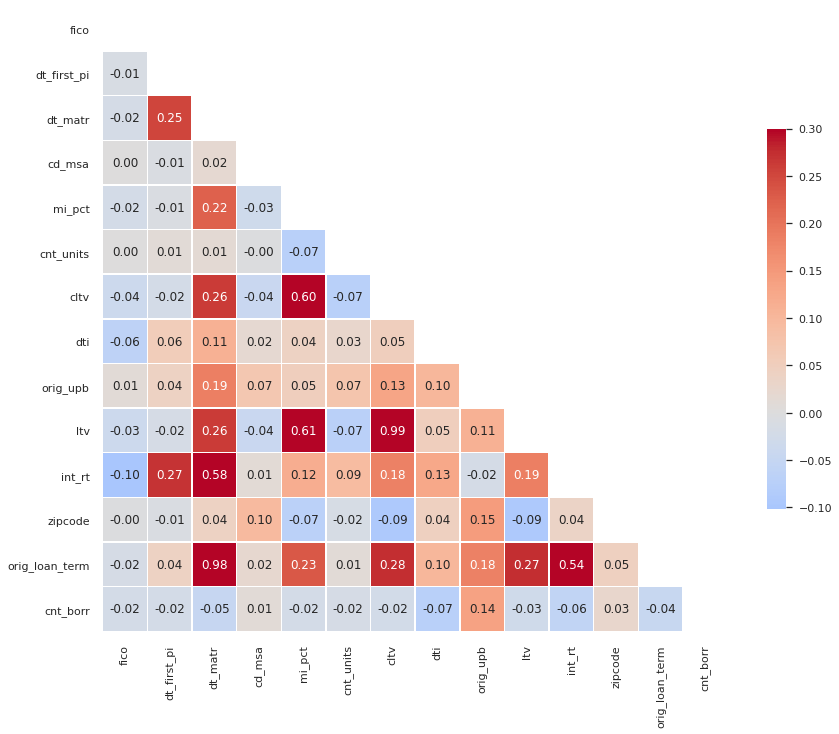

In [45]:
def heatmplot(corr):
    sns.set_style('white')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(14, 14))
    cmap = sns.diverging_palette(230,20, as_cmap=True)
    sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});
heatmplot(X_train_num.corr())

In [46]:
def create_dummies(df, cols):
    dummies = []
    for col in cols:
        dummies.append(pd.get_dummies(df[col], prefix=col))
    dummies = pd.concat(dummies, axis=1)
    result_df = pd.concat([df, dummies], axis=1).drop(cols, axis=1)
    return result_df

In [47]:
X_train_ohe = create_dummies(X_train, non_num_cols)

In [48]:
X_train_ohe.head()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,...,"servicer_name_SENECA MORTGAGE SERVICING, LLC",servicer_name_SPECIALIZED LOAN SERVICING LLC,"servicer_name_STEARNS LENDING, LLC","servicer_name_STEARNS LENDING, LLC.",servicer_name_SUNTRUST BANK,"servicer_name_SUNTRUST MORTGAGE, INC.",servicer_name_U.S. BANK N.A.,"servicer_name_UNITED SHORE FINANCIAL SERVICES, LLC",servicer_name_USAA FEDERAL SAVINGS BANK,"servicer_name_WELLS FARGO BANK, N.A."
1539335,787,201710,204709,47664.0,0,1,80,30,248000,80,...,0,0,0,0,0,0,0,0,0,0
295768,796,201502,204501,41740.0,0,1,75,27,329000,75,...,0,0,0,0,0,0,0,0,0,0
428251,808,201505,203004,37100.0,0,1,41,14,318000,41,...,0,0,0,0,0,0,0,0,0,0
2021675,786,201812,204811,39340.0,25,1,89,43,389000,89,...,0,0,0,0,0,0,0,1,0,0
1892555,775,201808,204807,22220.0,0,1,80,31,168000,80,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_test_ohe = create_dummies(X_test, non_num_cols)

In [50]:
X_test_ohe.head()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,...,"servicer_name_SENECA MORTGAGE SERVICING, LLC",servicer_name_SPECIALIZED LOAN SERVICING LLC,"servicer_name_STEARNS LENDING, LLC","servicer_name_STEARNS LENDING, LLC.",servicer_name_SUNTRUST BANK,"servicer_name_SUNTRUST MORTGAGE, INC.",servicer_name_U.S. BANK N.A.,"servicer_name_UNITED SHORE FINANCIAL SERVICES, LLC",servicer_name_USAA FEDERAL SAVINGS BANK,"servicer_name_WELLS FARGO BANK, N.A."
2041270,795,201812,203111,46060.0,0,1,55,31,227000,55,...,0,0,0,0,0,0,0,0,0,0
1877556,731,201808,204807,41620.0,0,1,72,36,280000,72,...,0,0,0,0,0,0,0,0,0,0
1040112,714,201609,204608,12060.0,0,1,80,22,146000,80,...,0,0,0,0,0,0,0,0,0,0
2031179,635,201812,204811,46060.0,0,1,68,45,130000,68,...,0,0,0,0,0,0,0,0,0,0
1126809,759,201610,204609,12060.0,0,1,80,39,356000,80,...,0,0,0,0,0,0,0,0,0,1


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [53]:
#Weight of Evidence for Feature Selection

In [54]:
import scorecardpy as sc

In [55]:
datacopy = loan_data.copy()

In [56]:
cat_cols = datacopy.select_dtypes('object').copy().columns

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
def lbl_encode(df, cols):
    for col in cols: df[col] = le.fit_transform(df[col])
    return df
datacopy = lbl_encode(datacopy, cat_cols)

In [59]:
datacopy.drop(['id_loan'], axis=1, inplace=True)

In [60]:
datacopy.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,channel,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,Default
0,717,201404,0,204403,39300.0,0,1,0,77,41,...,2,41,4,2800.0,2,360,2,23,18,0
1,813,201405,2,204404,19780.0,30,1,1,95,32,...,2,13,4,50300.0,2,360,1,23,25,1
2,742,201403,0,204402,31700.0,0,1,1,78,45,...,2,18,4,42100.0,0,360,1,23,25,0
3,735,201405,0,204404,33460.0,0,1,1,86,45,...,2,24,4,55000.0,1,360,2,23,25,0
4,667,201403,1,204402,31700.0,25,1,1,90,30,...,2,18,4,42100.0,2,360,2,23,25,0


In [61]:
train, test = sc.split_df(datacopy, y = 'Default', ratio = 0.7, seed=17).values()

In [62]:
train

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,channel,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,Default
1,813,201405,2,204404,19780.0,30,1,1,95,32,...,2,13,4,50300.0,2,360,1,23,25,1
3,735,201405,0,204404,33460.0,0,1,1,86,45,...,2,24,4,55000.0,1,360,2,23,25,0
4,667,201403,1,204402,31700.0,25,1,1,90,30,...,2,18,4,42100.0,2,360,2,23,25,0
5,801,201403,0,204402,36540.0,0,1,1,56,31,...,2,30,3,68100.0,1,360,2,23,25,0
7,736,201403,1,204402,31700.0,30,1,1,95,36,...,2,45,4,75900.0,2,360,2,23,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098585,755,201908,1,204907,29620.0,30,1,1,95,34,...,2,23,4,48800.0,2,360,2,23,25,0
2098587,747,201901,0,204812,38060.0,0,1,0,82,36,...,1,3,3,85200.0,1,360,1,12,25,0
2098589,666,201907,1,204906,31700.0,12,1,1,85,37,...,2,3,2,85900.0,2,360,2,23,25,0
2098590,798,201908,0,204907,29460.0,12,1,1,84,19,...,2,9,3,33800.0,1,360,2,23,25,0


In [63]:
train.to_csv('./output/train_noWOE.csv', index=False)
test.to_csv('./output/test_noWOE.csv', index=False)

In [64]:
bins = sc.woebin(train, y='Default')

[INFO] creating woe binning ...
Binning on 1469015 rows and 23 columns in 00:04:31


In [65]:
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
Woe transformating on 1469015 rows and 22 columns in 00:01:54
[INFO] converting into woe values ...
Woe transformating on 629578 rows and 22 columns in 00:00:48


In [66]:
bins.get('dt_first_pi')

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,dt_first_pi,"[-inf,201710.0)",1079254,0.734679,1047460,31794,0.029459,0.193108,0.030064,0.180893,201710.0,False
1,dt_first_pi,"[201710.0,201720.0)",86654,0.058988,85216,1438,0.016595,-0.393982,0.007628,0.180893,201720.0,False
2,dt_first_pi,"[201720.0,inf)",303107,0.206333,300477,2630,0.008677,-1.050433,0.143200,0.180893,inf,False


In [67]:
sc.iv(train_woe, 'Default')

,variable,info_value
18,fico_woe,0.720188
0,zipcode_woe,0.252235
6,st_woe,0.192180
9,dt_matr_woe,0.189059
4,dt_first_pi_woe,0.180893
14,cnt_borr_woe,0.154781
12,dti_woe,0.154148
8,servicer_name_woe,0.138433
19,int_rt_woe,0.128902
2,cltv_woe,0.086396
